In [2]:
### Importaciones ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.figure_factory as ff





# Tema a analizar
Relacion entre calidad del agua en poblaciones cercanas al rio de la plata y casos de diarrea(Enteritis y colitis) de las mismas comunidades en niños de 0 a 9 años, en los años 2016 a 2020.



Variables:
-Promedio ICA(indice de calidad del Agua)

fuente: https://datos.gob.ar/dataset/ambiente-indice-calidad-agua-por-estacion-ano-ica/archivo/ambiente_105567d7-37e0-4b8c-a360-b3e8334bc205


-Cantidad de casos(efectores públicos)


Fuente:
https://catalogo.datos.gba.gob.ar/dataset/egresos-hospitalarios/archivo/af100ed1-8030-4543-9582-7233f5f68548

# Hipótesis:
Aumento de casos de enteritis y colitis no infeccionsas en relación a la baja de la calidad del agua.

## Posibles modificadores(para futuros estudios):
Acceso al agua potable en las poblaciones estudiadas
Viviendas con cloácas
Indicadores de salud poblacionales no evaluados



Utilicé drive por el tamaño del datasetr de egresos(100mb)

Variable ICA:
El ICA se define como el grado de contaminación existente en el agua a la fecha
de un muestreo, expresado como un porcentaje de agua pura. Así, agua
altamente contaminada tendrá un ICA cercano o igual a 0% y de 100% para el
agua en excelentes condiciones.
Índice de Calidad del Agua

* 85 – 100 No Contaminado
* 70 - 84 Aceptable
* 50 – 69 Poco Contaminado
* 30 - 49 Contaminado
* 0  - 29 Altamente Contaminado

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
### Datos ###

#url_agua='https://drive.google.com/file/d/1USILdPNyhKsLfumuWE-B_OknXRR9jG9z/view?usp=sharing'
#url_ped='https://drive.google.com/file/d/1Azijnr0h-U59HWkqZwjTicKSsp6JGGG_/view?usp=sharing'

##Dejo los datos de drive por el tamaño del de egresos

df_agua=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tp final fundamentos/agc_p_indice_riodelaplata_estac_total.csv', sep=';')
df_pediatria=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tp final fundamentos/egresos_2016-2020.csv', sep=';')




In [5]:
### Primer acercamiento a los datos
df_agua.head(10)
print(df_agua.describe(), df_agua.info())
df_agua.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   localidad              329 non-null    object
 1   estacion_de_monitoreo  329 non-null    object
 2   año                    329 non-null    int64 
 3   ica_verano             328 non-null    object
 4   ica_otoño              289 non-null    object
 5   ica_invierno           288 non-null    object
 6   ica_primavera          288 non-null    object
dtypes: int64(1), object(6)
memory usage: 18.1+ KB
               año
count   329.000000
mean   2019.507599
std       2.295430
min    2016.000000
25%    2018.000000
50%    2020.000000
75%    2022.000000
max    2023.000000 None


,localidad,estacion_de_monitoreo,año,ica_verano,ica_otoño,ica_invierno,ica_primavera
0,Tigre,TI001,2016,31,51,35,18
1,Tigre,TI001,2017,43,43,35,38
2,Tigre,TI001,2018,36,62,61,67
3,Tigre,TI001,2019,59,53,77,61
4,Tigre,TI001,2020,75,s/i,s/i,64
5,Tigre,TI000,2021,42,48,64,55
6,Tigre,TI001,2022,55,59,49,61
7,Tigre,TI001,2023,53,NaN,NaN,NaN
8,Tigre,TI006,2016,30,35,33,34
9,Tigre,TI006,2017,27,46,44,60


Se encontraron datos nulos y datos con un string("s/i"), van a ser reemplazados por promedios de valores para no eliminar datos innecesariamente

In [6]:


columnas_ica=[x for x in df_agua.columns if x.startswith('ica')]

for col in columnas_ica:
    df_agua[col].replace('s/i', np.nan,inplace=True)
    df_agua[col].replace(0, np.nan,inplace=True)

###testeo si reemplazo valores null por promedio de los otros
df_agua['promedio_icas'] = df_agua[columnas_ica].astype(float).mean(axis=1)
icas_sin_ceros = df_agua[columnas_ica].astype(float)
icas_sin_ceros['promedio']=df_agua['promedio_icas']

icas_sin_ceros['ica_otoño'].fillna(icas_sin_ceros['promedio'], inplace=True)
icas_sin_ceros['ica_invierno'].fillna(icas_sin_ceros['promedio'], inplace=True)
icas_sin_ceros['ica_verano'].fillna(icas_sin_ceros['promedio'], inplace=True)
icas_sin_ceros['ica_primavera'].fillna(icas_sin_ceros['promedio'], inplace=True)
df_agua['promedio_icas_sin_ceros']=icas_sin_ceros[columnas_ica].astype(float).mean(axis=1)
icas_sin_ceros['promedio_icas_sin_ceros']=icas_sin_ceros[columnas_ica].astype(float).mean(axis=1)
df_agua.head(10)

,localidad,estacion_de_monitoreo,año,ica_verano,ica_otoño,ica_invierno,ica_primavera,promedio_icas,promedio_icas_sin_ceros
0,Tigre,TI001,2016,31,51,35,18,33.75,33.75
1,Tigre,TI001,2017,43,43,35,38,39.75,39.75
2,Tigre,TI001,2018,36,62,61,67,56.50,56.50
3,Tigre,TI001,2019,59,53,77,61,62.50,62.50
4,Tigre,TI001,2020,75,NaN,NaN,64,69.50,69.50
5,Tigre,TI000,2021,42,48,64,55,52.25,52.25
6,Tigre,TI001,2022,55,59,49,61,56.00,56.00
7,Tigre,TI001,2023,53,NaN,NaN,NaN,53.00,53.00
8,Tigre,TI006,2016,30,35,33,34,33.00,33.00
9,Tigre,TI006,2017,27,46,44,60,44.25,44.25


Cree una columna promedio para usar con el otro dataset, que tiene mediciones anuales de egresos hospitalarios. Y las medidas del ica eran por estación.

# El dataset tiene ahora promedio anual y por estacion , voy a probar de dos maneras para anilizar los datos

In [7]:
### Ya limpio hago un nuevo df para usar para los graficos y la exploracion
df_agua_filtro=pd.DataFrame()
df_agua_filtro['año']=df_agua['año'].astype(int)
df_agua_filtro['localidad']=df_agua['localidad'].astype(str)
df_agua_filtro['ica_verano']=icas_sin_ceros['ica_verano'].astype(float)
df_agua_filtro['ica_invierno']=icas_sin_ceros['ica_invierno'].astype(float)
df_agua_filtro['ica_otoño']=icas_sin_ceros['ica_otoño'].astype(float)
df_agua_filtro['ica_primavera']=icas_sin_ceros['ica_primavera'].astype(float)
df_agua_filtro['promedio_icas_sin_ceros']=df_agua['promedio_icas_sin_ceros'].astype(float)

#Eliminamos valores finales nulos finales
df_agua_filtro.dropna(inplace=True)
df_agua_filtro.info()
df_agua_filtro.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 327
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   año                      312 non-null    int64  
 1   localidad                312 non-null    object 
 2   ica_verano               312 non-null    float64
 3   ica_invierno             312 non-null    float64
 4   ica_otoño                312 non-null    float64
 5   ica_primavera            312 non-null    float64
 6   promedio_icas_sin_ceros  312 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 19.5+ KB


,año,ica_verano,ica_invierno,ica_otoño,ica_primavera,promedio_icas_sin_ceros
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,2019.336538,44.504274,45.757479,46.647436,44.151709,45.265224
std,2.225014,11.419014,13.476315,12.958986,11.247291,9.981575
min,2016.000000,16.000000,16.000000,16.000000,16.000000,16.000000
25%,2017.000000,38.000000,37.000000,38.000000,37.000000,39.000000
50%,2019.000000,44.000000,43.000000,44.000000,43.000000,44.250000
75%,2021.000000,49.000000,53.000000,53.000000,50.000000,50.562500
max,2023.000000,83.000000,100.000000,88.000000,83.000000,83.000000


In [ ]:
##Testeo para ver nulls o errores

# df_agua_filtro['año'] = df_agua_filtro.index.astype(int)
# df_agua_filtro.info()


# Análisis descriptivo

Primero agrupo las localidades qya que cada localidad tiene varias toma de muetra poor año. Además dejo en otro df, el rango de años que voy a usar para el merge con el otro df

In [8]:

# Filtrar los datos por el rango de años de interés
df_2016_2020 = df_agua_filtro[(df_agua_filtro['año'] >= 2016) & (df_agua_filtro['año'] <= 2020)]
df_2016_2020['año_estacion'] = df_2016_2020['año'].astype(str) + '.' + (df_2016_2020.index % 4 + 1).astype(str)
df_agua_filtro['año_estacion'] = df_2016_2020['año'].astype(str) + '.' + (df_2016_2020.index % 4 + 1).astype(str)

df_grouped = df_2016_2020.groupby('año_estacion')['promedio_icas_sin_ceros'].mean()

In [9]:
#### Hay varios resgistros por localidad por año, porq estan tomadas las mediciones en varias estaciones
## de esta manera dejamos solo una por localidad, para luego poder hacer merge con el otro dataset
#para no perder datos, usamos el promedio entre valores
df_agua_filtro = df_agua_filtro.groupby(['localidad', 'año']).mean().reset_index()

df_agua_filtro


<ipython-input-9-e9fa8676aa95>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agua_filtro = df_agua_filtro.groupby(['localidad', 'año']).mean().reset_index()


,localidad,año,ica_verano,ica_invierno,ica_otoño,ica_primavera,promedio_icas_sin_ceros
0,Avellaneda,2016,36.200000,36.000000,33.400000,27.400000,33.250000
1,Avellaneda,2017,31.000000,40.600000,29.000000,40.600000,35.300000
2,Avellaneda,2018,44.800000,61.600000,48.400000,55.600000,52.600000
3,Avellaneda,2019,48.600000,54.400000,40.400000,42.200000,46.400000
4,Avellaneda,2020,59.400000,53.800000,53.800000,48.200000,53.800000
...,...,...,...,...,...,...,...
73,Vicente Lopez,2019,42.333333,40.000000,40.666667,44.000000,41.750000
74,Vicente Lopez,2020,43.666667,43.666667,43.666667,43.666667,43.666667
75,Vicente Lopez,2021,41.333333,47.000000,42.444444,42.666667,43.361111
76,Vicente Lopez,2022,39.333333,39.000000,41.666667,52.666667,43.166667


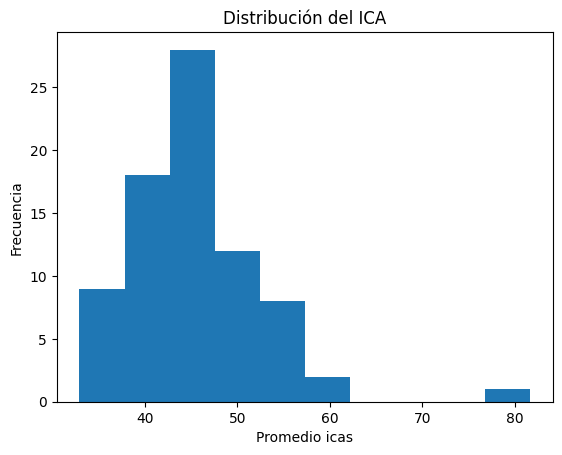

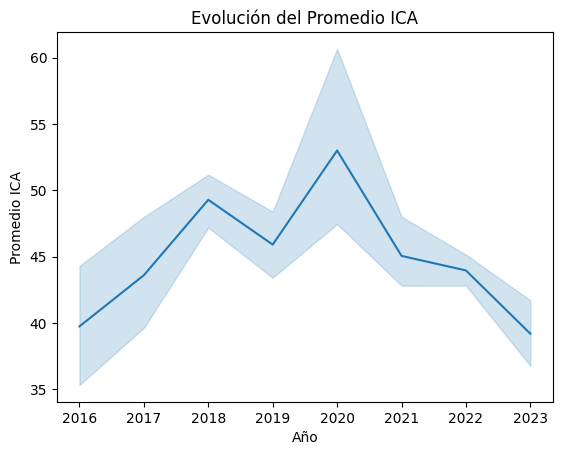

In [10]:

# Graficos para completar analisis descriptivo
plt.hist(df_agua_filtro['promedio_icas_sin_ceros'])
plt.xlabel('Promedio icas')
plt.ylabel('Frecuencia')
plt.title('Distribución del ICA')
plt.show()


fig = px.scatter(df_agua_filtro, x="año", y="promedio_icas_sin_ceros",
	         size="promedio_icas_sin_ceros", color="localidad",
                 hover_name="localidad", log_x=True, size_max=60)
fig.show()

hist_data = [df_agua_filtro['ica_verano'], df_agua_filtro['ica_primavera'], df_agua_filtro['ica_otoño'], df_agua_filtro['ica_invierno']]

group_labels = ['Verano', 'Primavera', 'Otoño', 'Invierno']

fig = ff.create_distplot(hist_data, group_labels, bin_size=2)
fig.show()


# LINEPLOT
sns.lineplot(x='año', y='promedio_icas_sin_ceros', data=df_agua_filtro)

plt.xlabel('Año')
plt.ylabel('Promedio ICA')
plt.title('Evolución del Promedio ICA')

plt.show()




#Lista de años únicos
#years = df_2016_2020['año'].unique()



Se pude detectar el mismo comportamiento en las diferentes localidades, así y todo voy a utilizar solo las localidades que están en el otro dataset para evaluar su posible correlación

#Primero realicé una regresion lineal de la calidad de agua en el tiempo, para poder entender su tendencia.
Intreresante destacar que si solo tomo hasta 2020 la tendencia es diferente. Podría ser por la pandemia?

-67.05569166364324


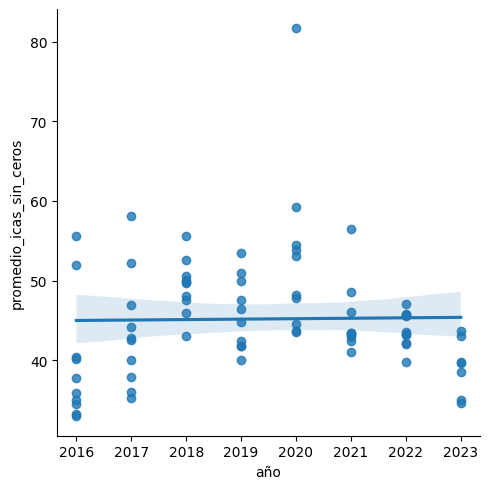

In [11]:


# Regresion de las medidas de ica
X = df_agua_filtro['año'].values.reshape(-1, 1)
y = df_agua_filtro['promedio_icas_sin_ceros']


reg = LinearRegression().fit(X, y)

# Coeficientes
print(reg.intercept_)
sns.lmplot(x='año', y='promedio_icas_sin_ceros', data=df_agua_filtro)
plt.show()

-6698.030145697497


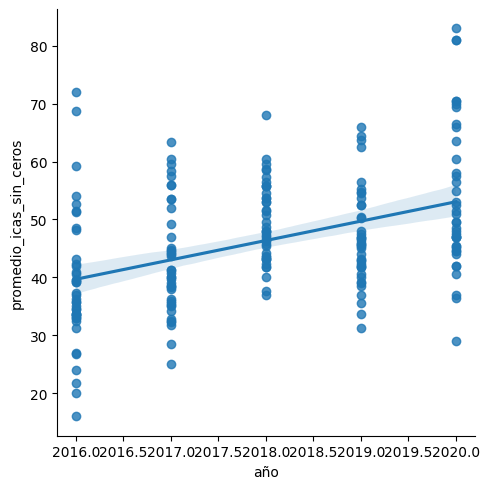

In [12]:
# Regresion de las medidas de ica 2016-2020
X = df_2016_2020['año'].values.reshape(-1, 1)
y = df_2016_2020['promedio_icas_sin_ceros']


reg = LinearRegression().fit(X, y)

# Coeficientes
print(reg.intercept_)
sns.lmplot(x='año', y='promedio_icas_sin_ceros', data=df_2016_2020)
plt.show()

# **Dataset 2, Egresos Hospitalarios 2016-2020**

In [13]:

df_pediatria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788697 entries, 0 to 788696
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   anio                       788697 non-null  int64 
 1   region_sanitaria           788697 non-null  object
 2   muncipio_nombre            788697 non-null  object
 3   muncipio_id                788697 non-null  int64 
 4   sexo                       788697 non-null  object
 5   grupo_edad                 788697 non-null  object
 6   causa_egreso_capitulo      788697 non-null  object
 7   causa_egreso_agrupamiento  788697 non-null  object
 8   tipo_egreso                788697 non-null  object
 9   cantidad                   788697 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 60.2+ MB


In [14]:
df_pediatria.head(10)


,anio,region_sanitaria,muncipio_nombre,muncipio_id,sexo,grupo_edad,causa_egreso_capitulo,causa_egreso_agrupamiento,tipo_egreso,cantidad
0,2016,VI,Almirante Brown,6028,Ignorado,0-4,Afecciones perinatales,Todos,Alta definitiva,1
1,2016,VI,Almirante Brown,6028,Ignorado,0-4,Enfermedad de la piel y del tejido subcutáneo,Todos,Alta definitiva,1
2,2016,VI,Almirante Brown,6028,Ignorado,15-19,"Embarazo, parto y puerperio",Complicaciones del trabajo de parto y del parto,Alta definitiva,2
3,2016,VI,Almirante Brown,6028,Ignorado,15-19,"Embarazo, parto y puerperio",Parto,Alta definitiva,1
4,2016,VI,Almirante Brown,6028,Ignorado,15-19,"Malformación congénitas, deformación y anomalí...",Todos,Alta definitiva,1
5,2016,VI,Almirante Brown,6028,Ignorado,30-34,"Síntomas, signos y hallazgos anormales clínico...",Todos,Alta definitiva,1
6,2016,VI,Almirante Brown,6028,Ignorado,35-39,Enfermedad del sistema respiratorio,Asma,Alta definitiva,1
7,2016,VI,Almirante Brown,6028,Ignorado,50-54,Enfermedad del sistema genitourinario,Demás enfermedades del sistema genitourinario,Alta definitiva,1
8,2016,VI,Almirante Brown,6028,Ignorado,50-54,"Traumatismos, envenenamientos y algunas otras ...",Traumatismos de la cabeza y cuello,Alta definitiva,1
9,2016,VI,Almirante Brown,6028,Ignorado,65-69,"Síntomas, signos y hallazgos anormales clínico...",Todos,Alta definitiva,1


#Creación de un dataset listo para el merge
necesito tener los mismos años y las mismas localidades donde fue medida el ica

In [15]:
df_pediatria_filtro = pd.DataFrame(columns=['año', 'municipio_nombre', 'edad', 'causa_egreso_agrupamiento'])
df_pediatria_filtro['año']=df_pediatria['anio'].astype(int)
df_pediatria_filtro['municipio_nombre']=df_pediatria['muncipio_nombre'].astype(str)
df_pediatria_filtro['edad']=df_pediatria['grupo_edad'].astype(str)
df_pediatria_filtro['causa_egreso_agrupamiento']=df_pediatria['causa_egreso_agrupamiento'].astype(str)
df_pediatria_filtro['cantidad']=df_pediatria['cantidad'].astype(int)






#Análisis de las variables de la base de datos de egresos hospitalarios

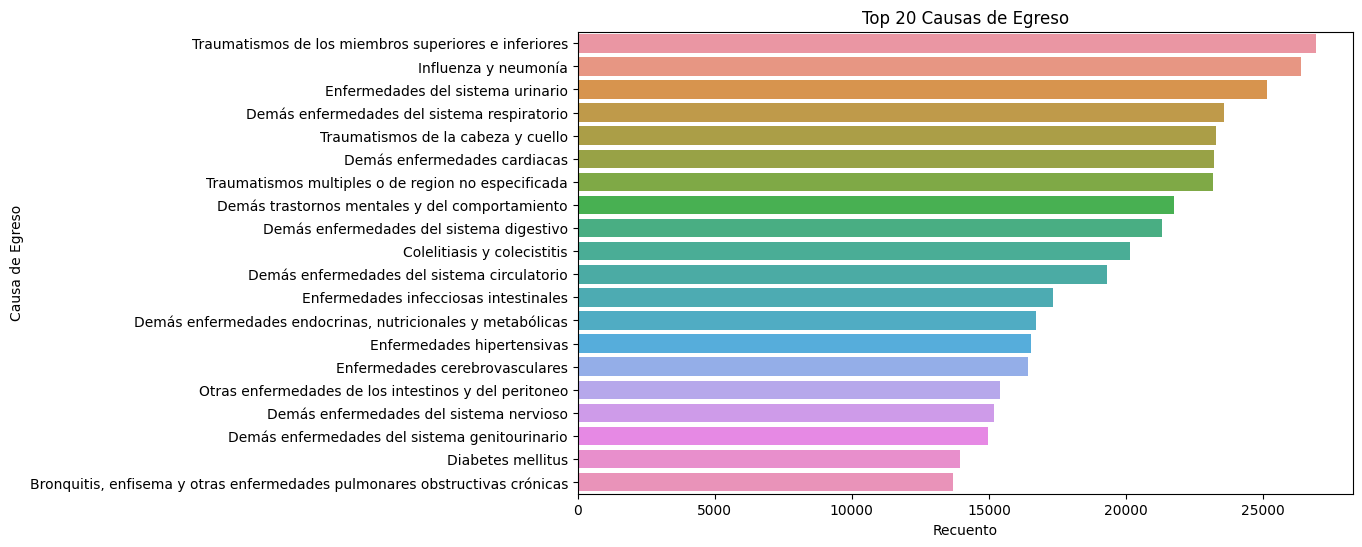

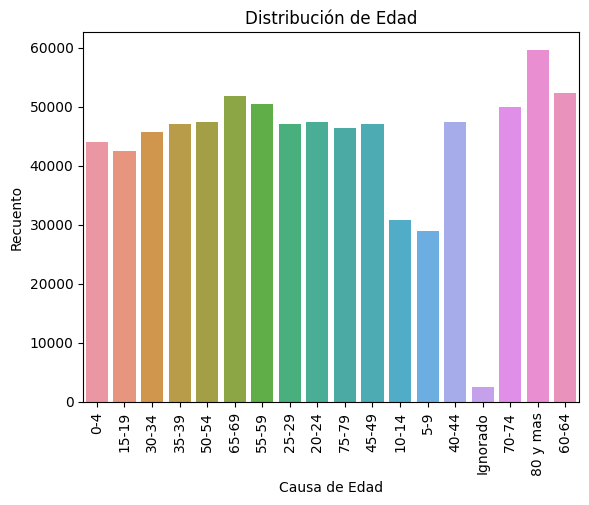

Malvinas Argentinas    19858
La Matanza             18674
La Plata               17957
Vicente López          15394
San Isidro             14663
                       ...  
Tornquist                972
Florencio Varela         712
Pila                     627
Chacabuco                554
Tordillo                 452
Name: muncipio_nombre, Length: 133, dtype: int64


In [16]:
#Base de datos egresos de hostpitales y centros de salud en las localidades de Buenos Aires Provincia
# Graficos para completar analisis descriptivo
sin_todos = df_pediatria[df_pediatria['causa_egreso_agrupamiento'] != 'Todos']

top_20 = sin_todos['causa_egreso_agrupamiento'].value_counts().head(20)

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=top_20.index, x=top_20.values, orient='h')
ax.set_title('Top 20 Causas de Egreso')
ax.set_xlabel('Recuento')
ax.set_ylabel('Causa de Egreso')
plt.show()



# tabla_frecuencias = df_pediatria['grupo_edad'].value_counts()
# print(tabla_frecuencias)



# tuve que ordenar manual
orden_categorias = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
                    '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 y mas', 'Ignorado']

frecuencias_ordenadas=df_pediatria
frecuencias_ordenadas = frecuencias_ordenadas.reindex(orden_categorias)



# plt.figure(figsize=(10, 6))
# sns.barplot(x=frecuencias_ordenadas.index, y=frecuencias_ordenadas.values)
# plt.title('Distribución de Edad (Ordenado)')
# plt.xlabel('Edad')
# plt.ylabel('Frecuencia')
# plt.xticks(rotation=90)
# plt.show()


sns.countplot(data=df_pediatria, x='grupo_edad')
plt.title('Distribución de Edad')
plt.xlabel('Causa de Edad')
plt.ylabel('Recuento')
plt.xticks(rotation=90)
plt.show()

tabla_frecuencias = df_pediatria['muncipio_nombre'].value_counts()
print(tabla_frecuencias)
# sns.countplot(data=df_pediatria, x='municipio_nombre')
# plt.title('Distribución de Localidades')
# plt.xlabel('Localidades')
# plt.ylabel('Recuento')
# plt.xticks(rotation=90)
# plt.show()






# Necesito tomar los mismos rangos de datos para poder hacer merge de los datasets

In [17]:
##### Tomar solo localidades que tengan medicion de agua

localidades_control=df_agua['localidad'].unique().tolist()
localidades_ped=df_pediatria_filtro['municipio_nombre'].unique().tolist()
tomas_agua=[]
for x in localidades_ped:
    if x in localidades_control:
        tomas_agua.append(x)

#df_pediatria_filtro = df_pediatria_filtro.drop('muncipio_nombre', axis=1)
#df_pediatria_filtro.info()

##### Tomar solo enteritis y colitis NO infecciosas
df_pediatria_filtro_edades_todas=df_pediatria_filtro.loc[(df_pediatria_filtro['causa_egreso_agrupamiento'] == 'Enteritis y colitis no infecciosas')]


df_pediatria_filtro=df_pediatria_filtro.loc[((df_pediatria_filtro['edad'] == '0-4') | (df_pediatria_filtro['edad'] == '5-9')) & (df_pediatria_filtro['causa_egreso_agrupamiento'] == 'Enteritis y colitis no infecciosas')]

#df_pediatria_filtro.loc[df_pediatria_filtro['municipio_nombre'] == 'Vicente Lopez', 'municipio_nombre'].value_counts()
df_pediatria_filtro = df_pediatria_filtro[df_pediatria_filtro['municipio_nombre'].isin(tomas_agua) & df_pediatria_filtro.duplicated(subset='municipio_nombre', keep=False)]
df_pediatria_filtro_edades_todas

,año,municipio_nombre,edad,causa_egreso_agrupamiento,cantidad
275,2016,25 de mayo,25-29,Enteritis y colitis no infecciosas,1
436,2016,25 de mayo,60-64,Enteritis y colitis no infecciosas,1
551,2016,Adolfo Alsina,0-4,Enteritis y colitis no infecciosas,1
570,2016,Adolfo Alsina,10-14,Enteritis y colitis no infecciosas,3
590,2016,Adolfo Alsina,15-19,Enteritis y colitis no infecciosas,2
...,...,...,...,...,...
787269,2020,José C. Paz,5-9,Enteritis y colitis no infecciosas,3
787622,2020,Lezama,75-79,Enteritis y colitis no infecciosas,1
787905,2020,Moreno,20-24,Enteritis y colitis no infecciosas,1
788555,2020,Suipacha,55-59,Enteritis y colitis no infecciosas,1


Voy a evaluar en niños de 0 a 9 años. Que por hábitos suelen padecer los problemas de salud por acceso y calidad del agua

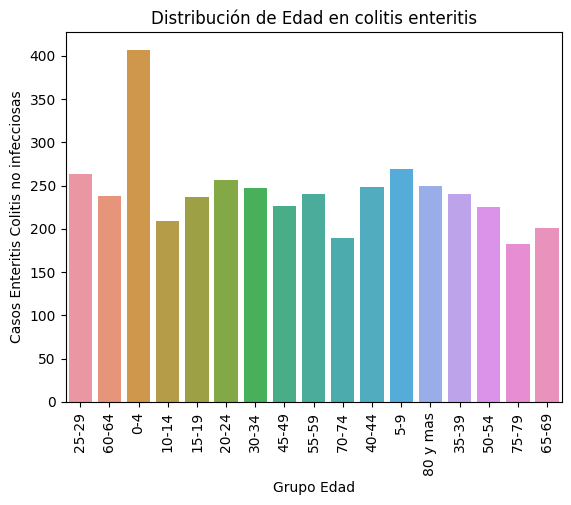

In [18]:
sns.countplot(data=df_pediatria_filtro_edades_todas, x='edad')
plt.title('Distribución de Edad en colitis enteritis')
plt.xlabel('Grupo Edad')
plt.ylabel('Casos Enteritis Colitis no infecciosas')
plt.xticks(rotation=90)
plt.show()

In [19]:
######## hace falta expandir si tengo cantidad 20 a 20 datos?
# df_ped_expandido = df_pediatria_filtro.loc[np.repeat(df_pediatria_filtro.index.values, df_pediatria_filtro['cantidad']), :].reset_index(drop=True)
# df_ped_expandido['cantidad'] = 1
# df_ped_expandido
df_agua_filtro = df_agua_filtro.rename(columns={'localidad': 'municipio_nombre'})


#Unión de Datasets

In [20]:
df_merged = pd.merge(df_agua_filtro, df_pediatria_filtro, on=['municipio_nombre', 'año'])
df_merged2 = pd.merge(df_agua_filtro, df_pediatria_filtro_edades_todas, on=['municipio_nombre', 'año'])

df_merged_2016_2020=df_merged.query("año >= 2016 and año <= 2020")
df_merged2

,municipio_nombre,año,ica_verano,ica_invierno,ica_otoño,ica_primavera,promedio_icas_sin_ceros,edad,causa_egreso_agrupamiento,cantidad
0,Avellaneda,2016,36.200000,36.000000,33.400000,27.400000,33.250000,0-4,Enteritis y colitis no infecciosas,2
1,Avellaneda,2016,36.200000,36.000000,33.400000,27.400000,33.250000,30-34,Enteritis y colitis no infecciosas,1
2,Avellaneda,2016,36.200000,36.000000,33.400000,27.400000,33.250000,35-39,Enteritis y colitis no infecciosas,2
3,Avellaneda,2016,36.200000,36.000000,33.400000,27.400000,33.250000,45-49,Enteritis y colitis no infecciosas,1
4,Avellaneda,2016,36.200000,36.000000,33.400000,27.400000,33.250000,50-54,Enteritis y colitis no infecciosas,2
...,...,...,...,...,...,...,...,...,...,...
431,Tigre,2020,57.666667,54.444444,54.444444,51.222222,54.444444,0-4,Enteritis y colitis no infecciosas,1
432,Tigre,2020,57.666667,54.444444,54.444444,51.222222,54.444444,5-9,Enteritis y colitis no infecciosas,1
433,Tigre,2020,57.666667,54.444444,54.444444,51.222222,54.444444,30-34,Enteritis y colitis no infecciosas,1
434,Tigre,2020,57.666667,54.444444,54.444444,51.222222,54.444444,75-79,Enteritis y colitis no infecciosas,1


Busqueda de la Relación edad-Enteritis colitis. PPrimer acercamiento



<ipython-input-27-dec785b54b15>:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



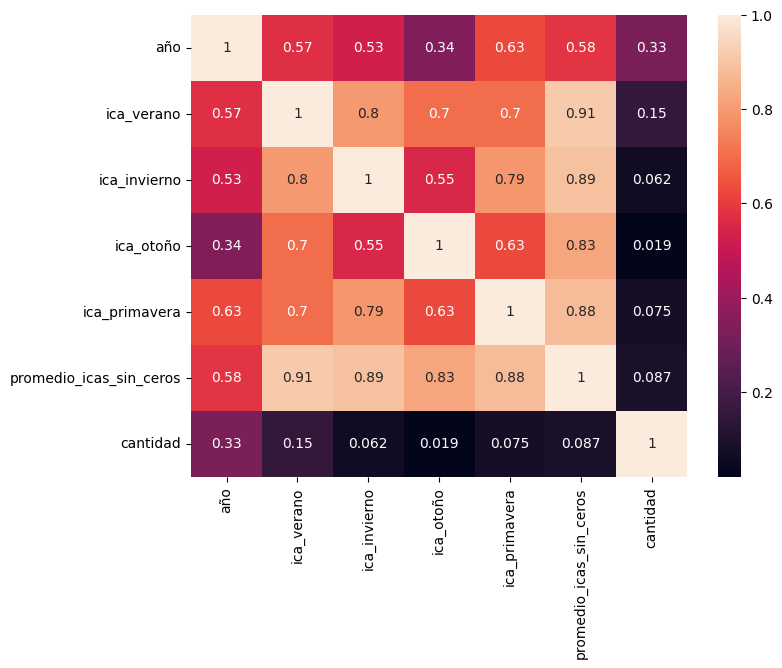

In [27]:
fig = px.box(df_merged, x="edad", y="cantidad", points="all")
fig.show()

fig = px.box(df_merged, x="municipio_nombre", y="cantidad", points="all")
fig.show()

correlaciones=df_merged.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones, annot=True)
plt.show()



# cambiar heatmap con todas las variables del merge, hacer de nuevo matriz de correlaciòn.
dellaceca.lara@gmail.com

# Nueva sección

#Regresión Linear de la comparación entre cantidad de casos de enteritis-colitis en niños de 0 a 9 años y el indice de calidad del agua en localidades linderas al rio de la plata

Utilicé el módulo dash de plotly express, que me permitía pinteractuar con los datos. Es un poco lento pero me pareció de simple implementación y puede usar varios modelos a la vez.

In [ ]:
pip install dash

#Encontré un problema con dash y es que me actualiza los dos gráficos cada vez que lo ejecuto, así q tengo q ver uno y luego el otro

Utilicé para entrenamiento un 80%-20%

In [ ]:
from dash import Dash, dcc, html, Input, Output
from sklearn.model_selection import train_test_split
from sklearn import linear_model, tree, neighbors
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

model1 = Dash(__name__)

models = {'Regression': linear_model.LinearRegression,
          'Decision Tree': tree.DecisionTreeRegressor,
          'k-NN': neighbors.KNeighborsRegressor}

model1.layout = html.Div([
    html.H4("Predicció Calidad del agua - Enteritis-colitis"),
    html.P("Select model:"),
    dcc.Dropdown(
        id='dropdown',
        options=["Regression", "Decision Tree", "k-NN"],
        value='Regression',
        clearable=False
    ),
    dcc.Graph(id="graph"),
])


@model1.callback(
    Output("graph", "figure"),
    Input('dropdown', "value"))
def train_and_display(name):
    df = df_merged
    X = df.promedio_icas_sin_ceros.values[:, None]
    X_train, X_test, y_train, y_test = train_test_split(
        X, df.cantidad, test_size=0.2,random_state=42)

    model = models[name]()
    model.fit(X_train, y_train)

    x_range = np.linspace(X.min(), X.max(), 100)
    y_range = model.predict(x_range.reshape(-1, 1))

    fig = go.Figure([
        go.Scatter(x=X_train.squeeze(), y=y_train,
                   name='train', mode='markers'),
        go.Scatter(x=X_test.squeeze(), y=y_test,
                   name='test', mode='markers'),
        go.Scatter(x=x_range, y=y_range,
                   name='prediction')
    ])
    return fig

model1.run_server(debug=True)

<IPython.core.display.Javascript object>

## *Se descubrieron dos valores atípicos muy altos así que los filtré para evaluar el comportamiento de la regresion sin ellos*

In [ ]:
#Corroborar que los tipicos estan eliminados
df_merged_sin_atipicos[df_merged_sin_atipicos['promedio_icas_sin_ceros'] >= 70]

,municipio_nombre,año,ica_verano,ica_invierno,ica_otoño,ica_primavera,promedio_icas_sin_ceros,edad,causa_egreso_agrupamiento,cantidad


In [ ]:
## Tengo dos valores atipicos muy raros ,voy a probar hacer la regresion sin esos dos valores


# Rango intercuartil para considerar valores atípicos
q1 = df_merged['promedio_icas_sin_ceros'].quantile(0.25)
q3 = df_merged['promedio_icas_sin_ceros'].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr #el valor es superior , no hay atipicos inferiores
limite_superior = q3 + 1.5 * iqr

# Elimino valores atípicos
df_merged_sin_atipicos = df_merged[(df_merged['promedio_icas_sin_ceros'] <= limite_superior)]

app = Dash(__name__)

models = {'Regression': linear_model.LinearRegression,
          'Decision Tree': tree.DecisionTreeRegressor,
          'k-NN': neighbors.KNeighborsRegressor}

app.layout = html.Div([
    html.H4("Predicción Calidad del agua - Enteritis-colitis"),
    html.P("Select model:"),
    dcc.Dropdown(
        id='dropdown',
        options=["Regression", "Decision Tree", "k-NN"],
        value='Regression',
        clearable=False
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"),
    Input('dropdown', "value"))
def train_and_display(name):
    df = df_merged_sin_atipicos
    X = df.promedio_icas_sin_ceros.values[:, None]
    X_train, X_test, y_train, y_test = train_test_split(
        X, df.cantidad, test_size=0.2,random_state=42)

    model = models[name]()
    model.fit(X_train, y_train)

    x_range = np.linspace(X.min(), X.max(), 100)
    y_range = model.predict(x_range.reshape(-1, 1))

    fig = go.Figure([
        go.Scatter(x=X_train.squeeze(), y=y_train,
                   name='train', mode='markers'),
        go.Scatter(x=X_test.squeeze(), y=y_test,
                   name='test', mode='markers'),
        go.Scatter(x=x_range, y=y_range,
                   name='prediction')
    ])
    return fig

app.run_server(debug=True)


<IPython.core.display.Javascript object>

# Evaluacion de los coeficientes


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
df = df_merged_sin_atipicos
X = df.promedio_icas_sin_ceros.values[:, None]
X_train, X_test, y_train, y_test = train_test_split(
X, df.cantidad, test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

# Predicciones en los datos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Coeficiente de determinación (R²) en los datos de entrenamiento y prueba
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Error cuadrático medio (MSE) en los datos de entrenamiento y prueba
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Error absoluto medio (MAE) en los datos de entrenamiento y prueba
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Coeficiente de determinación (R²) en datos de entrenamiento:", r2_train)
print("Coeficiente de determinación (R²) en datos de prueba:", r2_test)
print("Error cuadrático medio (MSE) en datos de entrenamiento:", mse_train)
print("Error cuadrático medio (MSE) en datos de prueba:", mse_test)
print("Error absoluto medio (MAE) en datos de entrenamiento:", mae_train)
print("Error absoluto medio (MAE) en datos de prueba:", mae_test)


Coeficiente de determinación (R²) en datos de entrenamiento: 9.243137023484671e-05
Coeficiente de determinación (R²) en datos de prueba: -0.008038577924576185
Error cuadrático medio (MSE) en datos de entrenamiento: 71.85370529438315
Error cuadrático medio (MSE) en datos de prueba: 90.67054998787083
Error absoluto medio (MAE) en datos de entrenamiento: 6.62299089801337
Error absoluto medio (MAE) en datos de prueba: 5.956927708012986


Todo indica que el modelo no se ajusta a una regresión lineal.
No está ajustando adecuadamente los datos y que existe una gran discrepancia entre las predicciones y los valores reales.


In [ ]:


X = df_2016_2020['año'].values.reshape(-1, 1)
y = df_2016_2020['promedio_icas_sin_ceros'].values
model = LinearRegression()
model.fit(X, y)
coeficiente = model.coef_
intercepto = model.intercept_
print("Coeficiente:", coeficiente)
print("Intercepto:", intercepto)


Coeficiente: [3.34211946]
Intercepto: -6698.030145697497


# Conclusión
No se encuentra relación entre el índice de calidad del agua y los casos de entero-colitis no infecciosas en población de 0 a 9 años. Diversas variables deberían analizarse para tener una conclusión más robusta. Creo una variable interesante a analizar debría ser el acceso al agua potable, ya que las tomas de calidad de agua se hacen sobre agua no potabilizada. También serian necesarios valores fuera de la pandemia para poder evaluar de manera completa sin tener sesgo.
Como las mediciones están en la costa también sería interesante realizar el estudio en fauna en vez de en humanos. Ya que podría pensarse que están más expuestos a los problemas.
Otra cosa interesante de evaluar podría ser diferentes enfermedades en piel en residencias costeras.
Se me ocurre también que se podría evaluar la actividad pesquera.

Importante de destacar que en general todas las medidas estan por debajo de 45, lo cual que significa que casi no hay en Rio de la Plata agua que no esté contaminada.

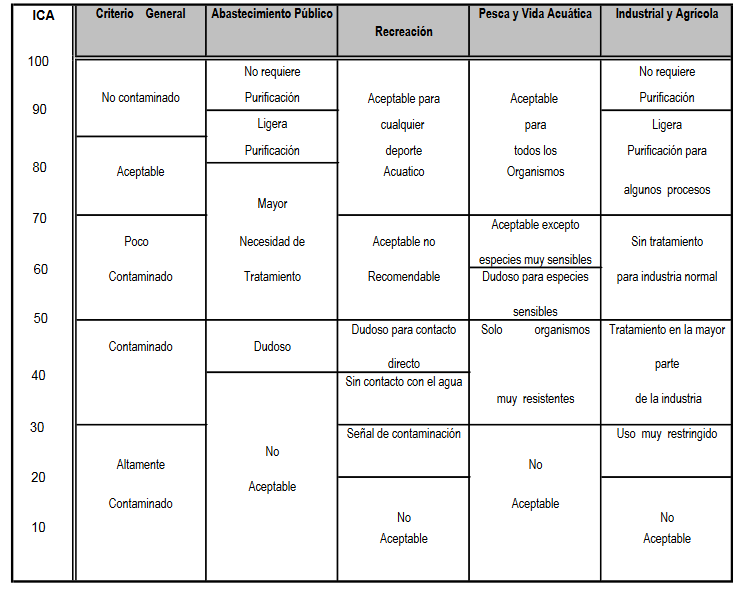